
Testing MLP with hidden_layers=[8], activation=relu


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.9333, Test Loss: 0.2057


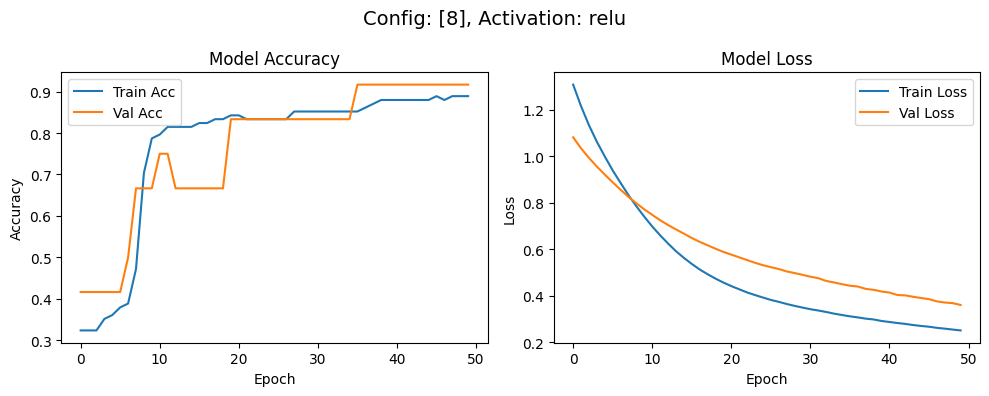


Testing MLP with hidden_layers=[8], activation=tanh
Test Accuracy: 0.9667, Test Loss: 0.2377


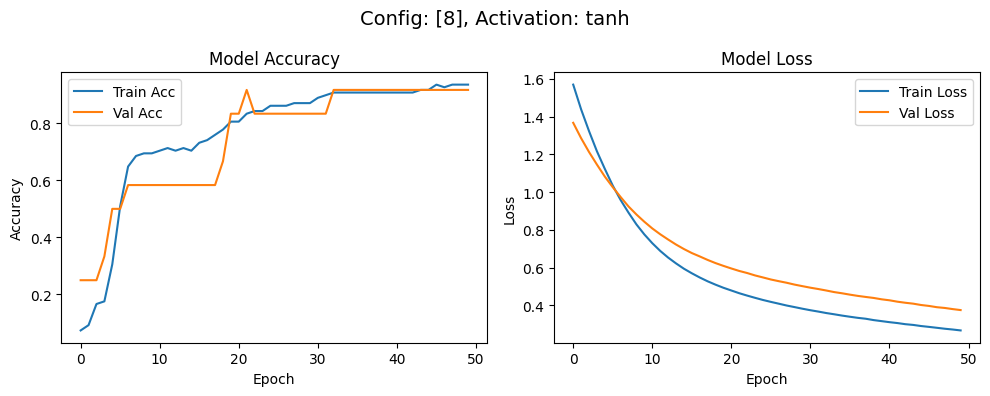


Testing MLP with hidden_layers=[8], activation=sigmoid
Test Accuracy: 0.8667, Test Loss: 0.4589


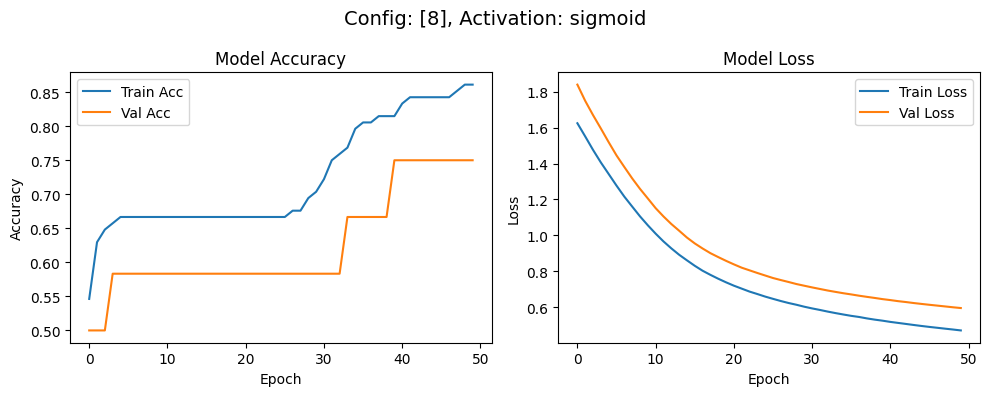


Testing MLP with hidden_layers=[16, 8], activation=relu
Test Accuracy: 1.0000, Test Loss: 0.0513


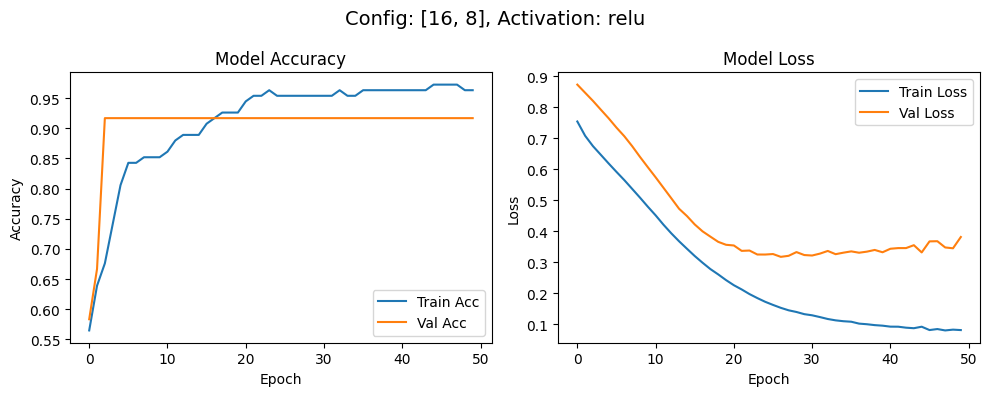


Testing MLP with hidden_layers=[16, 8], activation=tanh
Test Accuracy: 0.9667, Test Loss: 0.0890


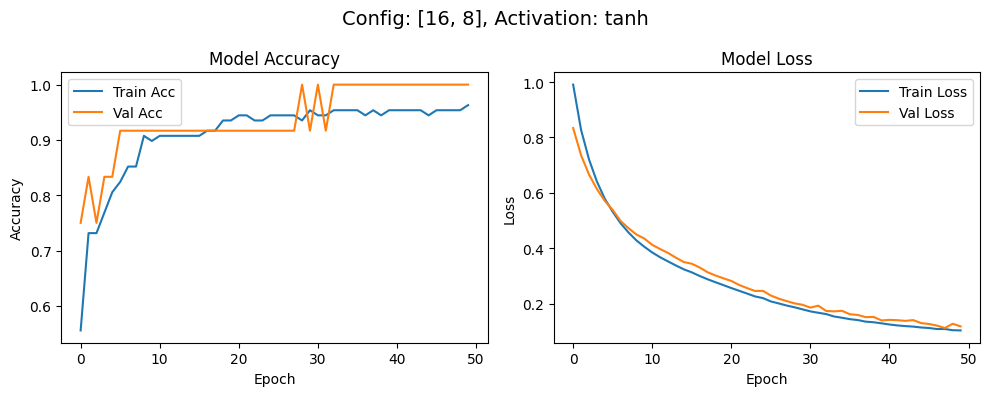


Testing MLP with hidden_layers=[16, 8], activation=sigmoid
Test Accuracy: 0.9333, Test Loss: 0.4662


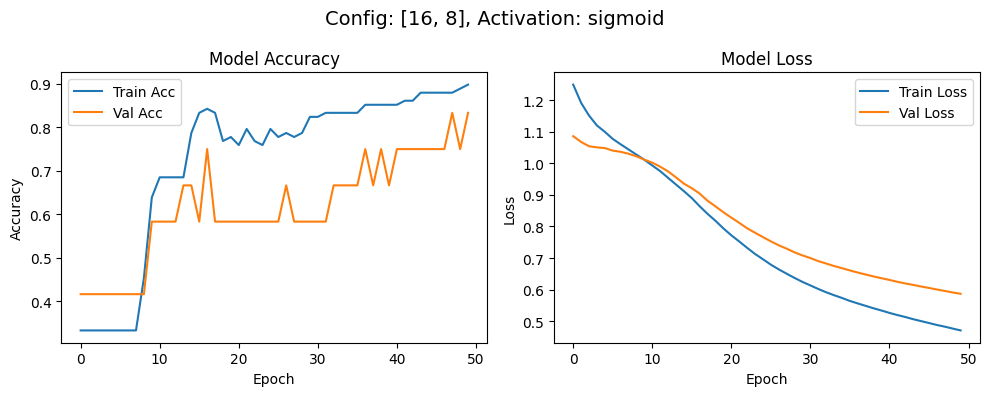


Testing MLP with hidden_layers=[32, 16, 8], activation=relu
Test Accuracy: 0.9667, Test Loss: 0.0509


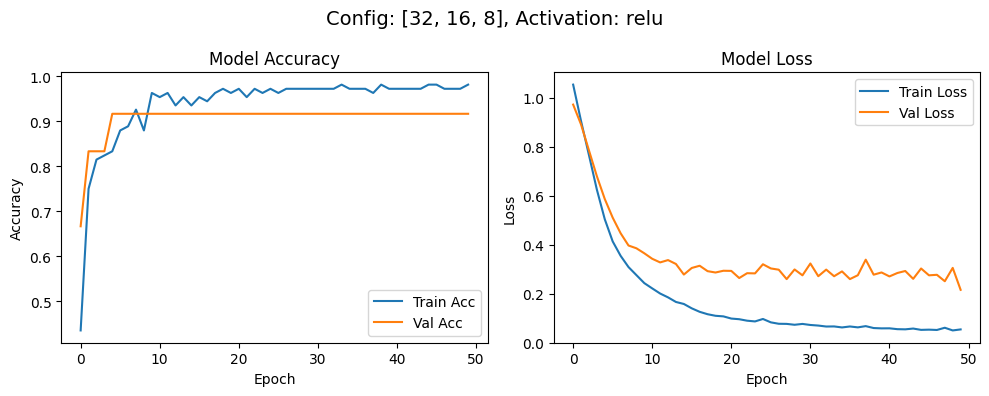


Testing MLP with hidden_layers=[32, 16, 8], activation=tanh
Test Accuracy: 1.0000, Test Loss: 0.0538


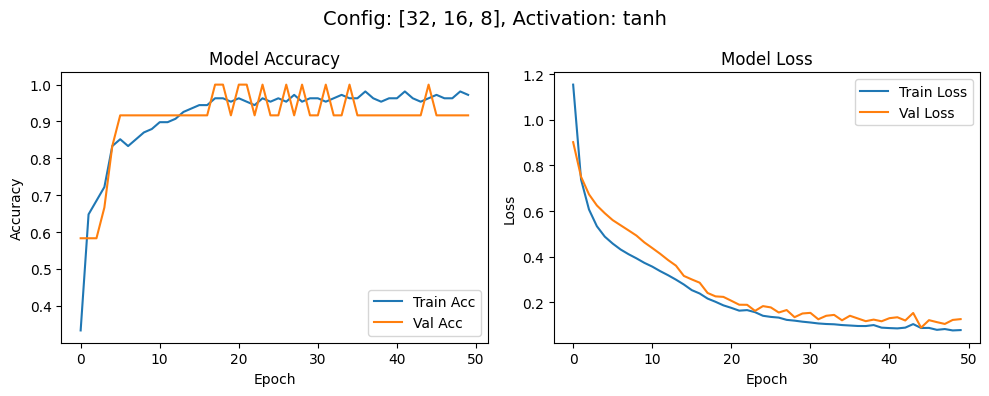


Testing MLP with hidden_layers=[32, 16, 8], activation=sigmoid
Test Accuracy: 0.9333, Test Loss: 0.4064


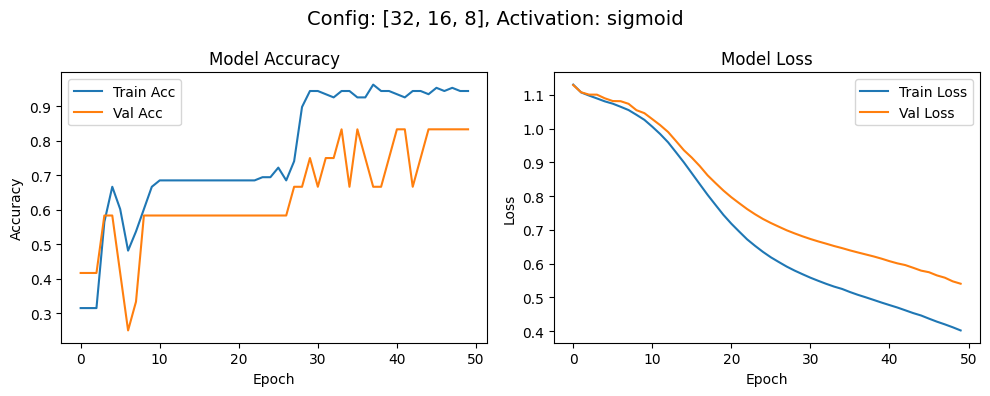

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Load and Preprocess Data
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
classes = iris.target_names

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# Step 3: Define MLP Model Creation Function
def create_mlp(input_dim, output_dim, hidden_layers, activation='relu'):
    model = Sequential()
    model.add(Dense(hidden_layers[0], input_dim=input_dim, activation=activation))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
    model.add(Dense(output_dim, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and Evaluate MLP with Various Configurations
hidden_layer_configs = [[8], [16, 8], [32, 16, 8]]
activations = ['relu', 'tanh', 'sigmoid']

for hidden_layers in hidden_layer_configs:
    for activation in activations:
        print(f"\nTesting MLP with hidden_layers={hidden_layers}, activation={activation}")
        model = create_mlp(input_dim=4, output_dim=3, hidden_layers=hidden_layers, activation=activation)
        history = model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=0, validation_split=0.1)
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

        # Step 5: Plot Accuracy and Loss Curves
        plt.figure(figsize=(10, 4))
        plt.suptitle(f"Config: {hidden_layers}, Activation: {activation}", fontsize=14)
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Acc')
        plt.plot(history.history['val_accuracy'], label='Val Acc')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Model Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Model Loss')
        plt.legend()
        plt.tight_layout()
        plt.show()


